In [2]:
import numpy as np
import pandas as pd
from scipy.stats import f
import matplotlib.pyplot as plt 
%matplotlib inline
import seaborn as sns
import scipy.stats as stats
from scipy.stats import ttest_1samp, ttest_ind
from statsmodels.stats.power import ttest_power
from statistics import mode

In [3]:
df=pd.read_csv('Wholesale+Customers+Data.csv')

In [4]:
df.describe()

,Buyer/Spender,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
count,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000
mean,220.500000,12000.297727,5796.265909,7951.277273,3071.931818,2881.493182,1524.870455
std,127.161315,12647.328865,7380.377175,9503.162829,4854.673333,4767.854448,2820.105937
min,1.000000,3.000000,55.000000,3.000000,25.000000,3.000000,3.000000
25%,110.750000,3127.750000,1533.000000,2153.000000,742.250000,256.750000,408.250000
50%,220.500000,8504.000000,3627.000000,4755.500000,1526.000000,816.500000,965.500000
75%,330.250000,16933.750000,7190.250000,10655.750000,3554.250000,3922.000000,1820.250000
max,440.000000,112151.000000,73498.000000,92780.000000,60869.000000,40827.000000,47943.000000


In [24]:
df.head()

,Buyer/Spender,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
0,1,Retail,Other,12669,9656,7561,214,2674,1338
1,2,Retail,Other,7057,9810,9568,1762,3293,1776
2,3,Retail,Other,6353,8808,7684,2405,3516,7844
3,4,Hotel,Other,13265,1196,4221,6404,507,1788
4,5,Retail,Other,22615,5410,7198,3915,1777,5185


In [5]:
df.groupby('Channel').sum()

,Buyer/Spender,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
Channel,,,,,,,
Hotel,71034,4015717,1028614,1180717,1116979,235587,421955
Retail,25986,1264414,1521743,2317845,234671,1032270,248988


In [6]:
df.groupby('Region').sum()

,Buyer/Spender,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
Region,,,,,,,
Lisbon,18095,854833,422454,570037,231026,204136,104327
Oporto,14899,464721,239144,433274,190132,173311,54506
Other,64026,3960577,1888759,2495251,930492,890410,512110


C:\diksha\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


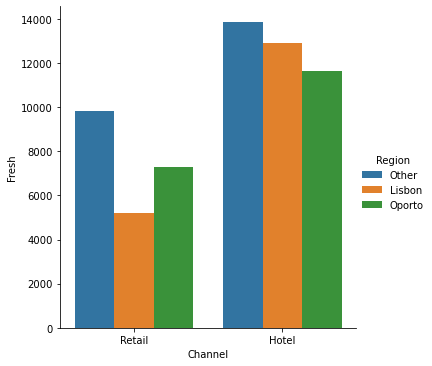

In [7]:
x=df['Channel']
y=df['Fresh']
sns.catplot('Channel','Fresh',hue='Region',kind='bar',ci=None,data=df)

C:\diksha\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


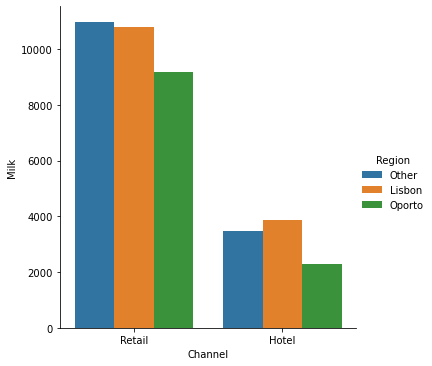

In [12]:
sns.catplot('Channel','Milk',hue='Region',kind='bar',ci=None,data=df)

C:\diksha\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


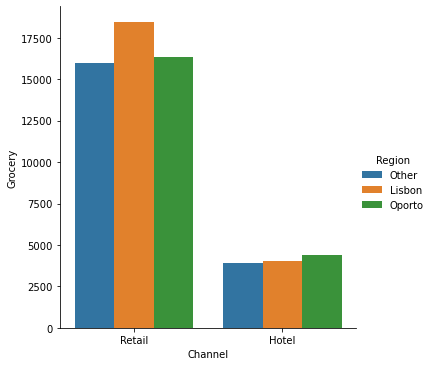

In [13]:
sns.catplot('Channel','Grocery',hue='Region',kind='bar',ci=None,data=df)

C:\diksha\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


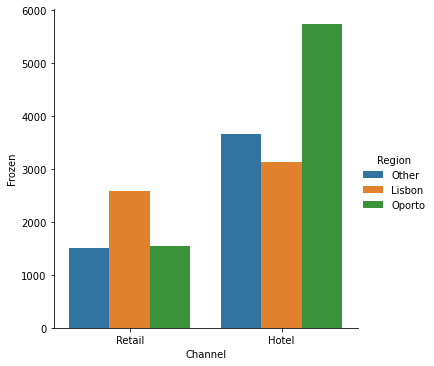

In [14]:
sns.catplot('Channel','Frozen',hue='Region',kind='bar',ci=None,data=df)

C:\diksha\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


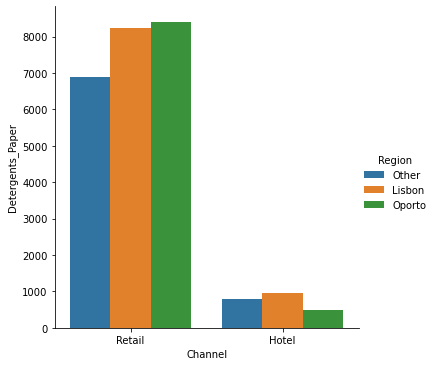

In [15]:
sns.catplot('Channel','Detergents_Paper',hue='Region',kind='bar',ci=None,data=df)

C:\diksha\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


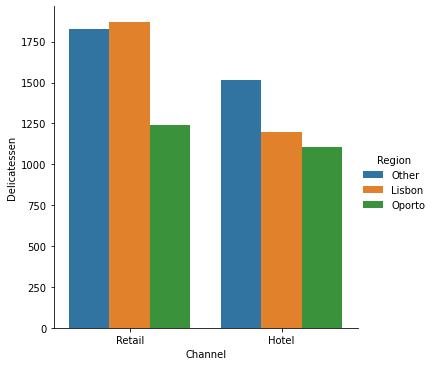

In [16]:
sns.catplot('Channel','Delicatessen',hue='Region',kind='bar',ci=None,data=df)

In [ ]:
d=df[df.dtypes[df.dtypes!='object'].index]
d

In [54]:
d.columns

Index(['Buyer/Spender', 'Fresh', 'Milk', 'Grocery', 'Frozen',
       'Detergents_Paper', 'Delicatessen'],
      dtype='object')

In [55]:
len(d.columns)
df.head()

,Buyer/Spender,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
0,1,Retail,Other,12669,9656,7561,214,2674,1338
1,2,Retail,Other,7057,9810,9568,1762,3293,1776
2,3,Retail,Other,6353,8808,7684,2405,3516,7844
3,4,Hotel,Other,13265,1196,4221,6404,507,1788
4,5,Retail,Other,22615,5410,7198,3915,1777,5185


In [66]:
df[df.dtypes[df.dtypes=='object'].index]

,Channel,Region
0,Retail,Other
1,Retail,Other
2,Retail,Other
3,Hotel,Other
4,Retail,Other
...,...,...
435,Hotel,Other
436,Hotel,Other
437,Retail,Other
438,Hotel,Other


In [17]:
df.std()

Buyer/Spender         127.161315
Fresh               12647.328865
Milk                 7380.377175
Grocery              9503.162829
Frozen               4854.673333
Detergents_Paper     4767.854448
Delicatessen         2820.105937
dtype: float64

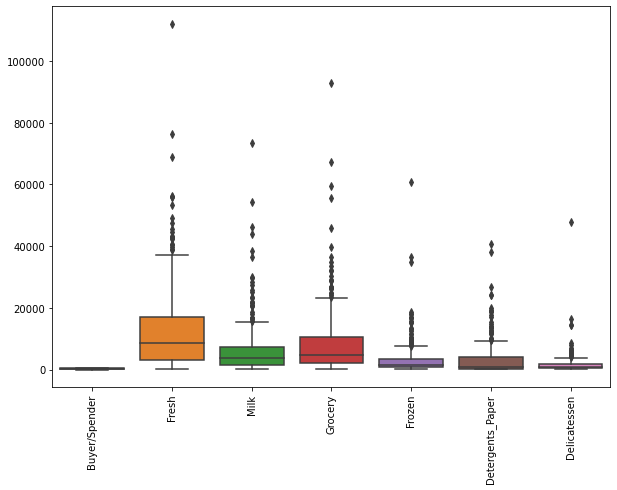

In [30]:
plt.figure(figsize=(10,7))
plt.xticks(rotation=90)
sns.boxplot(data=df)
plt.show()

2.1.1. Contigency table for Gender and Major

In [67]:
fd=pd.read_csv('Survey-1.csv')
fd.head()

,ID,Gender,Age,Class,Major,Grad Intention,GPA,Employment,Salary,Social Networking,Satisfaction,Spending,Computer,Text Messages
0,1,Female,20,Junior,Other,Yes,2.9,Full-Time,50.0,1,3,350,Laptop,200
1,2,Male,23,Senior,Management,Yes,3.6,Part-Time,25.0,1,4,360,Laptop,50
2,3,Male,21,Junior,Other,Yes,2.5,Part-Time,45.0,2,4,600,Laptop,200
3,4,Male,21,Junior,CIS,Yes,2.5,Full-Time,40.0,4,6,600,Laptop,250
4,5,Male,23,Senior,Other,Undecided,2.8,Unemployed,40.0,2,4,500,Laptop,100


In [24]:
ct = pd.crosstab(fd['Gender'],fd['Major'],margins = False)
ct

Major,Accounting,CIS,Economics/Finance,International Business,Management,Other,Retailing/Marketing,Undecided
Gender,,,,,,,,
Female,3,3,7,4,4,3,9,0
Male,4,1,4,2,6,4,5,3


2.1.2. Contigency table for Gender and Grad Intention

In [8]:
ct2=pd.crosstab(fd['Gender'],fd['Grad Intention'])
ct2

Grad Intention,No,Undecided,Yes
Gender,,,
Female,9,13,11
Male,3,9,17


2.1.4. Contigency table for Gender and Computer

In [11]:
ct3=pd.crosstab(fd['Gender'],fd['Computer'])
ct3

Computer,Desktop,Laptop,Tablet
Gender,,,
Female,2,29,2
Male,3,26,0


2.3. Assume that the sample is representative of the population of CMSU. Based on the data, answer the following question:
2.3.1. Find the conditional probability of different majors among the male students in CMSU.
2.3.2 Find the conditional probability of different majors among the female students of CMSU.

In [25]:
ct

Major,Accounting,CIS,Economics/Finance,International Business,Management,Other,Retailing/Marketing,Undecided
Gender,,,,,,,,
Female,3,3,7,4,4,3,9,0
Male,4,1,4,2,6,4,5,3


To get conditional probability we will divide each major subject with total number of students of that Gender.
Hence, We will divide Male gender by 29 and Female by 33

In [27]:
ct

Major,Accounting,CIS,Economics/Finance,International Business,Management,Other,Retailing/Marketing,Undecided
Gender,,,,,,,,
Female,3,3,7,4,4,3,9,0
Male,4,1,4,2,6,4,5,3


In [70]:
ff=fd.groupby(['Gender','Major']).Major.count()

In [77]:
fg=ff['Male']/29
fg

Major
Accounting                0.137931
CIS                       0.034483
Economics/Finance         0.137931
International Business    0.068966
Management                0.206897
Other                     0.137931
Retailing/Marketing       0.172414
Undecided                 0.103448
Name: Major, dtype: float64

In [78]:
fg1=ff['Female']/33
fg1

Major
Accounting                0.090909
CIS                       0.090909
Economics/Finance         0.212121
International Business    0.121212
Management                0.121212
Other                     0.090909
Retailing/Marketing       0.272727
Name: Major, dtype: float64

Major	Accounting	CIS	Economics/Finance	International Business	Management	Other	Retailing/Marketing	Undecided
Gender								
Female	0.090909090909091	0.090909090909091	0.212121212121212	0.121212121212121	0.121212121212121	0.090909090909091	0.272727272727273	0
Male	0.137931034482759	0.03448275862069	0.137931034482759	0.068965517241379	0.206896551724138	0.137931034482759	0.172413793103448	0.103448275862069
    

2.4. Assume that the sample is a representative of the population of CMSU. Based on the data, answer the following question:
2.4.1 Find the probability That a randomly chosen student is a male and intends to graduate.

2.6.  Construct a contingency table of Gender and Intent to Graduate at 2 levels (Yes/No). The Undecided students are not considered now and the table is a 2x2 table. Do you think the graduate intention and being female are independent events?

In [132]:

gd=pd.crosstab(fd['Gender'],fd['Grad Intention'],margins = False)
gd

Grad Intention,No,Undecided,Yes
Gender,,,
Female,9,13,11
Male,3,9,17


In [146]:
pp=fd[(fd['Grad Intention']=='Yes') | (fd['Grad Intention']=='No')]


array(['Yes', 'No'], dtype=object)

In [153]:
pp.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 40 entries, 0 to 61
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   ID                 40 non-null     int64  
 1   Gender             40 non-null     object 
 2   Age                40 non-null     int64  
 3   Class              40 non-null     object 
 4   Major              40 non-null     object 
 5   Grad Intention     40 non-null     object 
 6   GPA                40 non-null     float64
 7   Employment         40 non-null     object 
 8   Salary             40 non-null     float64
 9   Social Networking  40 non-null     int64  
 10  Satisfaction       40 non-null     int64  
 11  Spending           40 non-null     int64  
 12  Computer           40 non-null     object 
 13  Text Messages      40 non-null     int64  
dtypes: float64(2), int64(6), object(6)
memory usage: 4.7+ KB


In [377]:
fd.head()


,ID,Gender,Age,Class,Major,Grad Intention,GPA,Employment,Salary,Social Networking,Satisfaction,Spending,Computer,Text Messages
0,1,Female,20,Junior,Other,Yes,2.9,Full-Time,50.0,1,3,350,Laptop,200
1,2,Male,23,Senior,Management,Yes,3.6,Part-Time,25.0,1,4,360,Laptop,50
2,3,Male,21,Junior,Other,Yes,2.5,Part-Time,45.0,2,4,600,Laptop,200
3,4,Male,21,Junior,CIS,Yes,2.5,Full-Time,40.0,4,6,600,Laptop,250
4,5,Male,23,Senior,Other,Undecided,2.8,Unemployed,40.0,2,4,500,Laptop,100


In [149]:
fg=pd.crosstab(fd['Gender'],pp['Grad Intention'],margins = False)
fg

Grad Intention,No,Yes
Gender,,
Female,9,11
Male,3,17


In [164]:
Y=28/40
F=20/40


In [167]:
Y_INT_F=Y*F
Y_INT_F

0.35

Independent probability(P( Grad intention Yes)*P(Female))= P(Y)*P(F)=0.35

In [172]:
Y_BY_F=11/20
F=20/40

In [173]:
Y_INT_F=Y_BY_F*F
Y_INT_F

0.275

Dependent probability(p( Grad intention Yes/Female)*p(Female))= P(Y_BY_F)*P(F)=0.275

2.7 Note that there are four numerical (continuous) variables in the data set, GPA, Salary, Spending and Text Messages. Answer the following questions based on the data:
2.7.1 If a student is chosen randomly, what is the probability that his/her GPA is less than 3?

In [180]:
fd[fd['GPA']<3].GPA.count()

17

2.8.1 Note that there are four numerical (continuous) variables in the data set, GPA, Salary, Spending and Text Messages. For each of them comment whether they follow a normal distribution.

In [216]:
Mean=np.mean(fd['GPA'])
Mean

3.129032258064516

In [228]:
Median=np.median(fd['GPA'])
Median

3.1500000000000004

In [247]:
Mode=mode(fd['GPA'])
Mode

3.0

In [205]:
lo=stats.norm.cdf(fd['GPA'])

C:\diksha\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:ylabel='Density'>

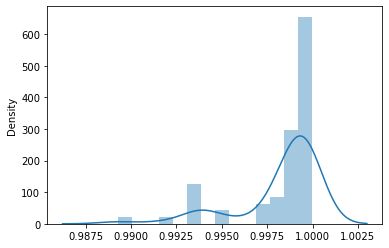

In [203]:
sns.distplot(lo)

C:\diksha\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\diksha\lib\site-packages\seaborn\distributions.py:305: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)


<AxesSubplot:ylabel='Density'>

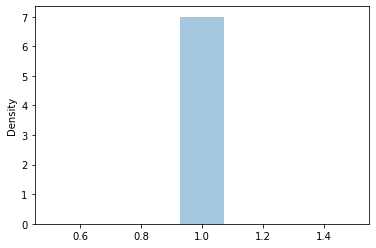

In [208]:
ls=stats.norm.cdf(fd['Salary'])
sns.distplot(ls)

In [238]:
np.mean(fd['Salary'])

48.54838709677419

In [240]:
np.median(fd['Salary'])

50.0

In [248]:
mode(fd['Salary'])

40.0

C:\diksha\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\diksha\lib\site-packages\seaborn\distributions.py:305: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)


<AxesSubplot:ylabel='Density'>

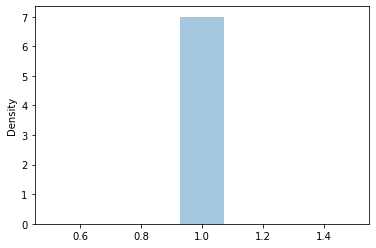

In [250]:
ls=stats.norm.cdf(fd['Spending'])
sns.distplot(ls)

In [251]:
np.mean(fd['Spending'])

482.01612903225805

In [252]:
np.median(fd['Spending'])

500.0

In [253]:
mode(fd['Spending'])

500

C:\diksha\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:ylabel='Density'>

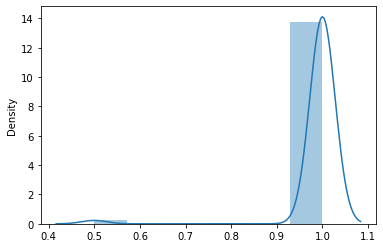

In [211]:
lt=stats.norm.cdf(fd['Text Messages'])
sns.distplot(lt)

In [254]:
np.mean(fd['Text Messages'])

246.20967741935485

In [255]:
np.median(fd['Text Messages'])

200.0

In [256]:
mode(fd['Text Messages'])

300

3.1 Do you think there is evidence that means moisture contents in both types of shingles are within the permissible limits? State your conclusions clearly showing all steps.

In [362]:
nan_policy='omit'

In [372]:
sd=pd.read_csv('A+&+B+shingles.csv')


In [369]:
sd.head()

,"A,B"
0,"0.44,0.14"
1,"0.61,0.15"
2,"0.47,0.31"
3,"0.30,0.16"
4,"0.15,0.37"


In [373]:
sd.mean()

A    0.316667
B    0.273548
dtype: float64

In [374]:
sd.std()

A    0.135731
B    0.137296
dtype: float64

In [329]:
A=sd['A']

In [330]:
B=sd['B']

In [332]:
astd=A.std()
astd

0.13573082605973166

In [350]:
bstd=B.std()
bstd

0.13729647694185443

In [358]:
import math
nan_policy='omit'

In [296]:
T_for_A=(0.316667-0.35)/(0.135731*math.sqrt(36))

In [360]:
T_for_A

-0.04093022227788789

In [343]:
Pvalue_A=stats.t.cdf(-0.04093,35)

In [375]:
Pvalue_A/2

0.24189607478044153

In [304]:
T_for_B=(0.273548-0.35)/(0.137296*math.sqrt(31))

In [305]:
T_for_B

-0.10001154112684266

In [357]:
Pvalue_B=stats.t.cdf(-0.10001,30)

In [376]:
Pvalue_B/2

0.2302504349801061

3.2 Do you think that the population mean for shingles A and B are equal? Form the hypothesis and conduct the test of the hypothesis. What assumption do you need to check before the test for equality of means is performed?

In [334]:
two_t_test=(0.316667-0.273548)/math.sqrt((astd*astd)/36 +(bstd*bstd)/31)

In [335]:
two_t_test

1.2885295582132774

In [336]:
degree_of_freedom=36+35-2

In [337]:
degree_of_freedom

69

In [346]:
pvalue2t=stats.t.cdf(two_t_test,degree_of_freedom,2)

In [347]:
pvalue2t

0.23959560887130738